In [2]:

import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
palette = ['#ff3b30', '#ffcc00', '#4cd964', '#007aff', '#5856d6', '#ff9500', '#5ac8fa', '#ff2d55']
markers=['o', '^', '<', 'd', '*','2']
sns.set_style("ticks")
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['lines.linewidth']=1
rc("font", **{'family':'serif','serif':['Palatino'], 'size':14})
rc('text', usetex=True)
import os

In [3]:
basepath="./"

In [18]:
def plot(total, name, title, use_logx=False, show_ylabel=True):
    GPMeld=[abs(float(line.split("\t")[0])) for line in total.split("\n")]
    PQT=[abs(float(line.split("\t")[1])) for line in total.split("\n")]
    DSR=[abs(float(line.split("\t")[2])) for line in total.split("\n")]
    VPG=[abs(float(line.split("\t")[3])) for line in total.split("\n")]
    GP=[abs(float(line.split("\t")[4])) for line in total.split("\n")]
    EGP=[abs(float(line.split("\t")[5])) for line in total.split("\n")]
    Racing_CVGP=[abs(float(line.split("\t")[6])) for line in total.split("\n")]
    
    df=pd.DataFrame({
        "model": Racing_CVGP+EGP+GP+GPMeld+PQT+DSR+VPG,
        "type": ['Racing-CVGP(ours)']*10+['CVGP']*10+['GP']*10+['GPMeld']*10+['PQT']*10+['DSR']*10+['VPG']*10
    })
    

    plt.figure(figsize=(3,3))
    ax=sns.boxplot(data=df, x="model", y="type", 
                   showfliers=False, 
                   width=.8,
                    palette=palette)
    ax.set_title(title, fontsize=16)
    if use_logx==True:
        plt.xscale('log', base=10)
    ax.set(xlabel="Time Usage (Mins)", ylabel="")
    if show_ylabel==False:
        ax.set(yticklabels=[])
        
    plt.yticks(rotation=25)
    fname = os.path.join(basepath, name+".pdf")
    plt.savefig(fname, bbox_inches='tight', pad_inches=0)

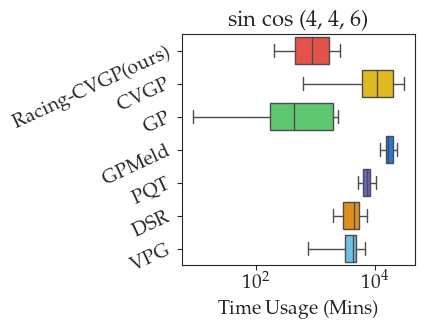

In [19]:
total="""23190	5973	3585	4837	17.78472835	1173.976509	342.5135237
16232	10203	5629	4576	264.3552078	20014.0337	327.9169747
13510	7398	7299	3984	8.868987848	614.3886018	1757.300515
16843	5726	2610	2484	703.7657179	9126.44447	864.8101509
15026	7198	4236	3519	153.1126069	10969.64204	861.9072246
15422	5174	4562	6514	616.6892579	30613.66831	2520.116337
15967	8275	5413	6612	25346.22609	21200.96717	199.9986796
21508	7789	2469	3013	2368.919623	17446.82215	2110.643897
11899	6874	1983	731	4800.474776	4969.515702	767.664028
21132	16898	4962	4562	235.2470389	10180.27665	1449.01639"""

name="sincos_nv4_nt46_"
title="sin cos (4, 4, 6)"
plot(total, name, title, use_logx=True, show_ylabel=True)

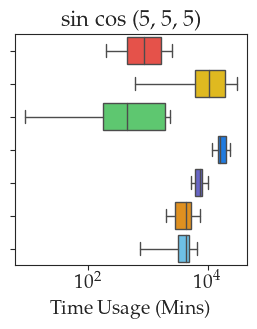

In [21]:
text="""3623	2488	2850	7.410074597	1560.265049	342.5135237
6542	5585	7040	9928.594446	10861.02066	327.9169747
4325	1672	1963	29.7427029	1420.895576	1757.300515
7983	3322	1870	332.6943965	101605.4587	864.8101509
4029	2389	2494	141.5759884	502.6757969	861.9072246
7254	4090	4288	52.55299923	97145.98354	2520.116337
5740	1124	1410	459.1695414	4062.754547	199.9986796
5077	2561	2521	2858.418083	13145.27425	2110.643897
2414	1899	2000	262.3734935	39.39285704	767.664028
4628	2225	1467	11.87664639	609.9070656	1449.01639"""
name="sincos_nv5_nt55_"
title="sin cos (5, 5, 5)"
plot(total, name, title, use_logx=True, show_ylabel=False)

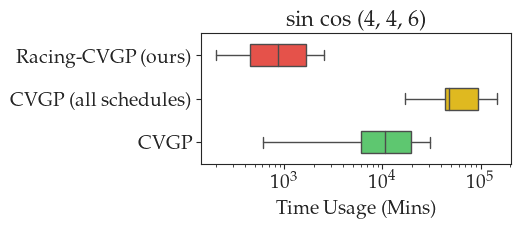

In [6]:
def plot_all(total, name, title, use_logx=False, show_ylabel=True):
    all_egp=[abs(float(line.split("\t")[0])) for line in total.split("\n")]
    EGP=[abs(float(line.split("\t")[1])) for line in total.split("\n")]
    Racing_CVGP=[abs(float(line.split("\t")[2])) for line in total.split("\n")]
    
    df=pd.DataFrame({
        "model": Racing_CVGP+all_egp+EGP,
        "type": ['Racing-CVGP (ours)']*10+['CVGP (all schedules)']*10+['CVGP']*10
    })
    

    plt.figure(figsize=(4,1.7))
    ax=sns.boxplot(data=df, x="model", y="type", 
                   showfliers=False, 
                   width=.5,
                   palette=palette)
    ax.set_title(title, fontsize=16)
    if use_logx==True:
        plt.xscale('log', base=10)
    ax.set(xlabel="Time Usage (Mins)", ylabel="")
    if show_ylabel==False:
        ax.set(yticklabels=[])
        
    # plt.yticks(rotation=21)
    fname = os.path.join(basepath, name+"all_time.pdf")
    plt.savefig(fname, bbox_inches='tight', pad_inches=0)


text="""111087.7819	1173.976509	342.5135237
42635.08154	20014.0337	327.9169747
16974.85739	614.3886018	1757.300515
148480.517	9126.44447	864.8101509
44520.58764	10969.64204	861.9072246
59974.69176	30613.66831	2520.116337
49433.33912	21200.96717	199.9986796
106938.2524	17446.82215	2110.643897
42330.14459	4969.515702	767.664028
46547.43395	10180.27665	1449.01639"""
name="sincos_nv4_nt46_"
title="sin cos (4, 4, 6)"
plot_all(text, name, title, use_logx=True, show_ylabel=True)